In [30]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import IPython.display
import scipy.io.wavfile
import scipy.fftpack

NOTEBOOK_ID = "SYNTHESIS_BASIS"
OUTPUT_PATH = f"out/{NOTEBOOK_ID}/"

if not os.path.isdir(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

C5  = 523.251
Db5 = 554.370
D5  = 587.330
Eb5 = 622.250
E5  = 659.255
F5  = 698.456
Gb5 = 729.990
G5  = 783.991
Ab5 = 830.610
A5  = 880.000
Bb5 = 932.330
B5  = 987.770

# 소리 합성

임의의 두 소리 데이터 벡터 $s_1$과 $s_2$가 있을 때 두 소리는 파동이므로 합성된 소리 $s$는 다음과 같을 것이다.

$$s=s_1+s_2$$

이를 일반화 해보면 n개의 소리 데이터 벡터 $s_1, s_2, \cdots, s_n$에 대해서 합성된 소리 $s$는 다음과 같을 것이다.

$$s = \sum^n_{i=1}{s_i}$$

In [31]:
def get_processed_data(data):
    """
    convert music data into int16 data
    :param data:
    :return:
    """
    amplitude = 12000
    return ((data/np.max(np.abs(data))) * amplitude).astype(np.int16)

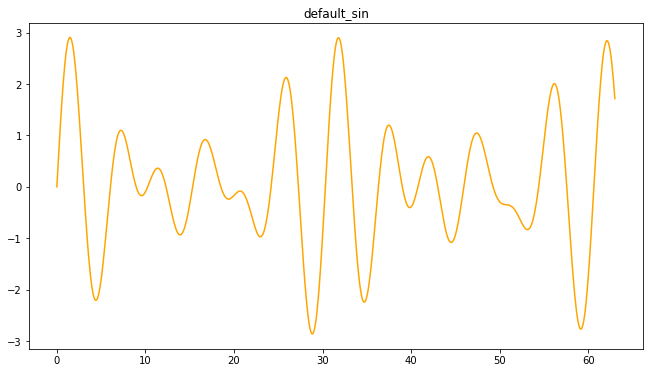

In [32]:
fig, ax = plt.subplots(figsize=(11, 6))

fs = 44100 # sampling rate

def get_sin_data(fs: int, s: float, hz: float) -> np.ndarray:
    """
    return ordinary sin data
    :param fs: sampling rate
    :param s: sec
    :param hz: frequency to want to get sin data
    :return: sin data
    """
    s *= 0.7 # time apply
    d = np.linspace(0, s, int(fs*s))
    return np.sin(hz * 2 * np.pi*d)


data = np.hstack((
    get_sin_data(fs, 2, C5) + get_sin_data(fs, 2, E5) + get_sin_data(fs, 2, G5)
))

proc_data = get_processed_data(data)

_name = "default_sin"
_fname = _name + ".wav"

ax.plot(np.linspace(0, fs/len(data[0:700]), len(data[0:700])), data[0:700], color="orange")
ax.set_title(_name)

scipy.io.wavfile.write(OUTPUT_PATH + _fname, fs, proc_data)

IPython.display.Audio(OUTPUT_PATH + _fname)

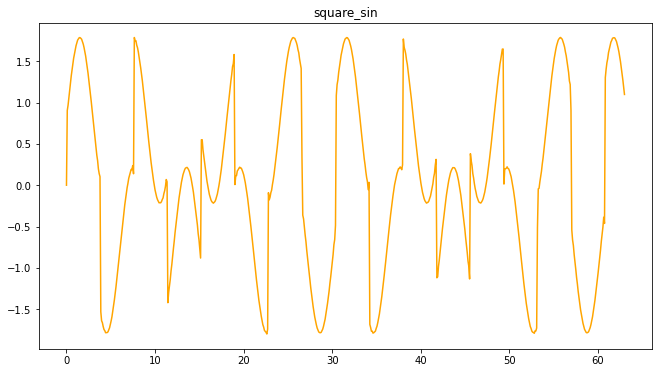

In [33]:
fig, ax = plt.subplots(figsize=(11, 6))

fs = 44100 # sampling rate

def get_square_sin_data(fs: int, s: float, hz: float) -> np.ndarray:
    """
    return ordinary sin data
    :param fs: sampling rate
    :param s: sec
    :param hz: frequency to want to get sin data
    :return: sin data
    """
    s *= 0.7
    d = np.linspace(0, s, int(fs*s))
    F = lambda n, X: np.sin(hz*2*np.pi*(2*n+1)*X)/(2*n+1)
    y = np.zeros(d.shape)
    for k in range(100+1): y = F(k, d) + y
    return y


data = np.hstack((
    get_square_sin_data(fs, 2, C5) + get_sin_data(fs, 2, E5)
))

proc_data = get_processed_data(data)

_name = "square_sin"
_fname = _name + ".wav"

ax.plot(np.linspace(0, fs/len(data[0:700]), len(data[0:700])), data[0:700], color="orange")
ax.set_title(_name)

scipy.io.wavfile.write(OUTPUT_PATH + _fname, fs, proc_data)

IPython.display.Audio(OUTPUT_PATH + _fname)

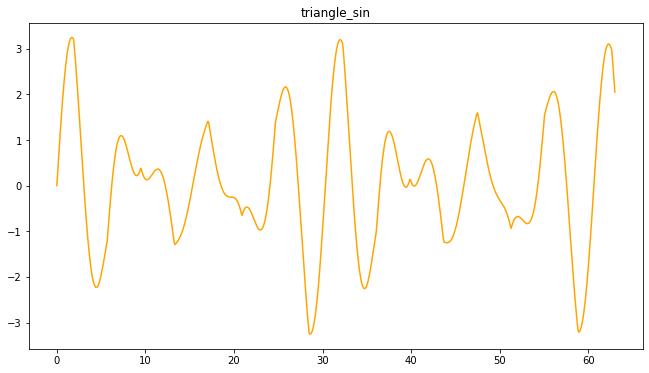

In [36]:
fig, ax = plt.subplots(figsize=(11, 6))

fs = 44100 # sampling rate

def get_triangle_sin_data(fs: int, s: float, hz: float) -> np.ndarray:
    """
    return ordinary sin data
    :param fs: sampling rate
    :param s: sec
    :param hz: frequency to want to get sin data
    :return: sin data
    """
    s *= 0.7
    d = np.linspace(0, s, int(fs*s))
    return np.arcsin(np.sin(hz*2*np.pi*d))


data = np.hstack((
    get_triangle_sin_data(fs, 2, C5) + get_sin_data(fs, 2, E5) + get_sin_data(fs, 2, G5)
))

proc_data = get_processed_data(data)

_name = "triangle_sin"
_fname = _name + ".wav"

ax.plot(np.linspace(0, fs/len(data[0:700]), len(data[0:700])), data[0:700], color="orange")
ax.set_title(_name)

scipy.io.wavfile.write(OUTPUT_PATH + _fname, fs, proc_data)

IPython.display.Audio(OUTPUT_PATH + _fname)

In [35]:
fig, ax = plt.subplots(figsize=(11, 6))

fs = 44100 # sampling rate

def get_sawtooth_sin_data(fs: int, s: float, hz: float) -> np.ndarray:
    """
    return ordinary sin data
    :param fs: sampling rate
    :param s: sec
    :param hz: frequency to want to get sin data
    :return: sin data
    """
    s *= 0.7
    d = np.linspace(0, s, int(fs*s))
    return (hz * d - np.floor(hz*d)) * 2 -1


data = np.hstack((
    get_sawtooth_sin_data(fs, 2, C5) + get_sin_data(fs, 2, E5) + get_sin_data(fs, 2, G5)
))

proc_data = get_processed_data(data)

_name = "sawtooth_sin"
_fname = _name + ".wav"

ax.plot(np.linspace(0, fs/len(data[0:700]), len(data[0:700])), data[0:700], color="orange")
ax.set_title(_name)

scipy.io.wavfile.write(OUTPUT_PATH + _fname, fs, proc_data)

IPython.display.Audio(OUTPUT_PATH + _fname)

In [34]:
plt.figure(figsize=(12, 10), dpi=600)

fs = 44100

time_accel = 1.0

def get_sin_data(fs, s, hz):
    s *= time_accel
    d = np.linspace(0, s, int(fs * s))
    return get_piano2(fs, s, hz)
    # return hz * d - np.floor(hz*d)
    # return np.arcsin(np.sin(hz*2*np.pi*d))
    #F = lambda n, X: np.sin(hz*2*np.pi*(2*n+1)*X)/(2*n+1)
    #y = np.zeros(d.shape)
    #for k in range(100+1): y = F(k, d) + y
    #return y
    # return np.sin(hz*2*np.pi*d)


def get_piano(fs, s, hz):
    d = np.linspace(0, s, int(fs * s))
    return -1/4*np.sin(3*hz*np.pi*d) + 1/4*np.sin(hz*np.pi*d) + np.sqrt(3)/2*np.cos(hz*np.pi*d)

def get_piano2(fs, s, hz):
    d = np.linspace(0, s, int(fs * s))
    Y = np.zeros_like(d)
    for i in range(10):
        Y += np.sin((i+1) * hz * 2*np.pi*d) * np.exp(-0.0004 * 2 * np.pi * hz * d) / 2 ** i
    Y += Y ** 3
    Y *= 1 + 16 * d * np.exp(-6 * d)
    return Y


plt.plot(np.linspace(0, len(data)/fs, len(data))[0:1000], data[0:1000], color='orange')

proc_data = ((data/np.max(np.abs(data))) * 12000).astype(np.int16)
scipy.io.wavfile.write(f"out/{'test1'}.wav", fs, proc_data)

$0<b<a<1$ 이라고 하자 이때, $b^b$, $b^a$, $a^b$의 대소 관계를 비교하시오.

$b^a < b^b < a^b$